In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
balloon_clicks_default = [23, 19, 16, 22, 5, 22, 28, 18, 14, 7, 15, 14, 4, 18, 17, 7, 4, 18, 14, 10, 25, 9, 13, 19, 26, 17, 9, 6, 15, 17
, 16, 27, 14, 10, 4, 18, 15, 9, 16, 8, 5, 20, 12, 30, 24, 5, 17, 18, 6, 26]
len(balloon_clicks_default)

50

In [3]:
balloon = pd.read_excel("C:\\Users\\User\\Downloads\\ZYVO\\game\\Prolific_01.xlsx",sheetname='Balloon',header=0)

In [4]:
balloon[['Sequence','Score']].iloc[4:10]

,Sequence,Score
4,5,0
5,6,10
6,7,10
7,8,10
8,9,10
9,10,0


In [5]:
balloon['row_num'] = list(range(0,balloon.shape[0]))
balloon['Score'] = balloon.apply(lambda x : x.Score if(x.Score!=0) else balloon_clicks_default[x.row_num%50], axis=1)

In [6]:
balloon[['Sequence','Score']].iloc[4:10]

,Sequence,Score
4,5,5
5,6,10
6,7,10
7,8,10
8,9,10
9,10,7


In [7]:
ProlificId = list(balloon['ProlificId'].unique())
len(ProlificId)

77

In [8]:
sum_of_score = pd.DataFrame({'sum_score' : balloon.groupby('ProlificId')['Score'].sum()}).reset_index()
sum_of_score.shape

(77, 2)

In [9]:
sum_of_score.head()

,ProlificId,sum_score
0,546ec14dfdf99b2bc7ebd032,413
1,54a70109fdf99b7cd759d21f,237
2,5589cf61fdf99b18bd86d076,395
3,558a1a79fdf99b2d7699aa79,336
4,559af16efdf99b361ac467b2,474


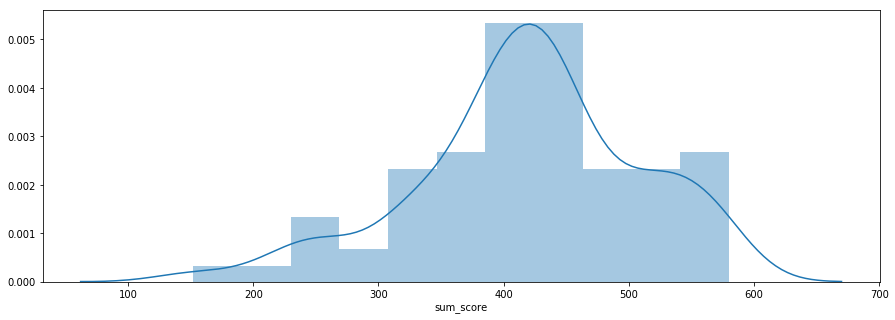

In [10]:
import seaborn as sns
sns.distplot(sum_of_score.sum_score)
fig = plt.gcf()
fig.savefig('Balloon_Score_distibution.png')